In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pandas as pd
import h5py
from tqdm.notebook import tqdm
import collections as cl
import re

import warnings
warnings.filterwarnings('ignore')

# load embedding

In [2]:
embedding = 'vggish'
data = h5py.File('embeddings.h5', 'r')

# def printname(name):
#     print(name)
# data.visit(printname)

In [3]:
###### IRMAS data ######
dataset = 'irmas'
keys_ori = list(data[dataset][embedding]['keys'])
key_clip = list(set(keys_ori))
len(key_clip)

6705

In [4]:
instruments = [key[key.index('[')+1:key.index(']')] for key in key_clip]
cl.Counter(instruments)

Counter({'sax': 626,
         'gel': 760,
         'gac': 637,
         'cla': 505,
         'tru': 577,
         'pia': 721,
         'org': 682,
         'flu': 451,
         'cel': 388,
         'vio': 580,
         'voi': 778})

In [42]:
group_matcher = re.compile(r'.*?\]\[(?P<class>\w+)\]\d.*')

def groupname(x):
    res = re.match(group_matcher, x)
    return res.groups()[0]

genres = [groupname(_) for _ in key_clip]
print(set(genres), len(genres))

{'cla', 'pop_roc', 'lat_sou', 'jaz_blu', 'cou_fol'} 6705


In [43]:
matcher = re.compile(r'.*?\[(?P<class>\w+)\].*')

def classname(x):
    res = re.match(matcher, x)
    return res.groups()[0]

instruments = [classname(_) for _ in key_clip]
print(set(instruments), len(instruments))

{'cla', 'org', 'cel', 'vio', 'gac', 'voi', 'gel', 'sax', 'tru', 'pia', 'flu'} 6705


In [44]:
instrument_map = {'cla': 'clarinet', 
                   'org': 'organ',
                   'cel': 'cello',
                   'vio': 'violin',
                   'gac': 'guitar-ac',
                   'voi': 'voice',
                   'gel': 'guitar-el',
                   'sax': 'saxophone',
                   'tru': 'trumpet',
                   'pia': 'piano',
                   'flu': 'flute'}

genre_map = {'pop_roc': 'pop_roc',
            'jaz_blu': 'jazz_blue',
            'cla': 'classical',
            'cou_fol': 'country_folk',
            'lat_sou': 'latin_soul'}

In [45]:
instruments = [instrument_map[key] for key in instruments]
print(set(instruments), len(instruments))

genres = [genre_map[key] for key in genres]
print(set(genres), len(genres))

{'cello', 'clarinet', 'guitar-ac', 'piano', 'voice', 'organ', 'guitar-el', 'violin', 'trumpet', 'flute', 'saxophone'} 6705
{'pop_roc', 'country_folk', 'latin_soul', 'classical', 'jazz_blue'} 6705


In [46]:
key_info = pd.DataFrame(columns=['instrument', 'genre', 'file_name'])
key_info['instrument'] = instruments
key_info['genre'] = genres
key_info['file_name'] = key_clip

In [47]:
genre_info = pd.DataFrame(columns=['instrument', 'genre', 'examples'])

for inst in set(instruments):
    for genre in set(genres):

        inst_genre_examples = key_info[(key_info['instrument'] == inst) & (key_info['genre'] == genre)]

        inst_genre = pd.DataFrame(columns=['instrument', 'genre', 'examples'])
        inst_genre['instrument'] = [inst]
        inst_genre['genre'] = [genre]
        inst_genre['examples'] = [len(inst_genre_examples)]

        genre_info = genre_info.append(inst_genre)

genre_info = genre_info.reset_index(drop=True)

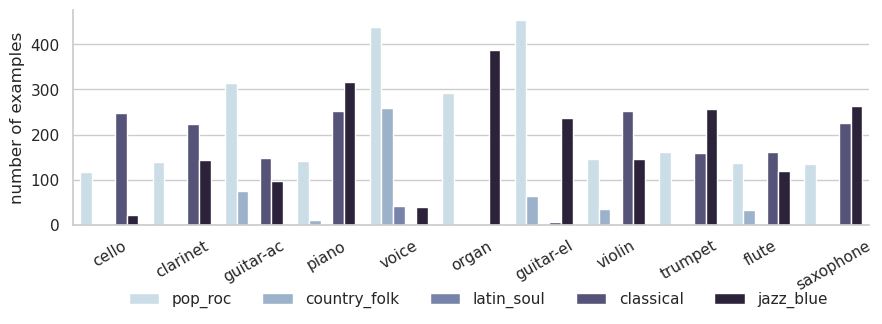

In [48]:
# save cosine similarity into a csv file
sns.set_theme(context='notebook', style='whitegrid') # , font_scale=1.6)

ax = sns.catplot(data=genre_info, x='instrument', y='examples', hue='genre', kind='bar', height=3, aspect=3, 
               legend_out=False, palette="ch:s=.25,rot=-.25")
ax.set(ylabel='number of examples')
ax.set(xlabel=None)
lgd = sns.move_legend(ax, "lower center", bbox_to_anchor=(.54, -.1), ncol=5, title=None, frameon=False)
plt.subplots_adjust(wspace=0.1)
ax.set_xticklabels(rotation=30)
plt.savefig('results/genre_information.pdf', bbox_inches='tight')

In [25]:
genre_info

,instrument,genre,examples
0,cello,pop_roc,118
1,cello,country_folk,0
2,cello,latin_soul,0
3,cello,classical,247
4,cello,jazz_blue,23
5,clarinet,pop_roc,139
6,clarinet,country_folk,0
7,clarinet,latin_soul,0
8,clarinet,classical,223
9,clarinet,jazz_blue,143


In [93]:
# get genre information table
instrument_class = [instrument_map[key] for key in instrument_map]
genre_class = [genre_map[key] for key in genre_map]

genre_num =pd.DataFrame(columns=instrument_class, index=genre_class)
for inst in instrument_class:
    for genre in genre_class:
        genre_num[inst][genre] = int(genre_info.loc[(genre_info['instrument'] == inst) & (genre_info['genre'] == genre)]['examples'])

genre_num

,clarinet,organ,cello,violin,guitar-ac,voice,guitar-el,saxophone,trumpet,piano,flute
pop_roc,139,292,118,146,314,439,454,135,161,141,137
jazz_blue,143,387,23,146,98,39,237,263,257,317,120
classical,223,0,247,253,149,0,6,225,159,252,161
country_folk,0,3,0,35,76,258,63,3,0,11,33
latin_soul,0,0,0,0,0,42,0,0,0,0,0


In [94]:
genre_num['sum'] = list(pd.Series(genre_num.sum(1), dtype=int))
genre_num

,clarinet,organ,cello,violin,guitar-ac,voice,guitar-el,saxophone,trumpet,piano,flute,sum
pop_roc,139,292,118,146,314,439,454,135,161,141,137,2476
jazz_blue,143,387,23,146,98,39,237,263,257,317,120,2030
classical,223,0,247,253,149,0,6,225,159,252,161,1675
country_folk,0,3,0,35,76,258,63,3,0,11,33,482
latin_soul,0,0,0,0,0,42,0,0,0,0,0,42


In [95]:
genre_table = genre_num.append(pd.Series(genre_num.sum(0), name='sum'))
genre_table

,clarinet,organ,cello,violin,guitar-ac,voice,guitar-el,saxophone,trumpet,piano,flute,sum
pop_roc,139,292,118,146,314,439,454,135,161,141,137,2476
jazz_blue,143,387,23,146,98,39,237,263,257,317,120,2030
classical,223,0,247,253,149,0,6,225,159,252,161,1675
country_folk,0,3,0,35,76,258,63,3,0,11,33,482
latin_soul,0,0,0,0,0,42,0,0,0,0,0,42
sum,505,682,388,580,637,778,760,626,577,721,451,6705


In [103]:
# num_row = []
# for item, num in genre_table.iterrows():
#     num_row.append(list(num))

# num_row = np.array(num_row)
# num_row